In [6]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [7]:
list_path=os.listdir(r"kbank")
list_path=["kbank/"+i for i in list_path]
list_path

['kbank/328075606_195280519847558_5422862341212571169_n.jpg',
 'kbank/328704669_555935456508883_4947135486638571424_n.jpg',
 'kbank/328708367_932339307780805_7755118869628126485_n.jpg',
 'kbank/328719393_1882899432049132_4090644282942730702_n.jpg',
 'kbank/328762080_922422385579450_3999838522527409067_n.jpg',
 'kbank/328786956_1315768059353540_1053466874880859004_n.jpg',
 'kbank/328934075_1634740660273435_5587175595349089600_n.jpg',
 'kbank/329213522_1617836908682119_3248399617048302197_n.jpg',
 'kbank/329820726_5935688879856154_5702680316539402154_n.jpg',
 'kbank/333278692_2581220138682349_5881749234224771026_n.jpg',
 'kbank/333691758_883279299416131_4706611491705686686_n.jpg',
 'kbank/333830996_154485777420407_7096311492983827444_n.jpg',
 'kbank/333965918_1399729754108417_6108531851776535629_n.jpg',
 'kbank/334047164_3364177923820671_8982296255646355145_n.jpg',
 'kbank/IMG_3352.JPG',
 'kbank/LINE_ALBUM_slip_230227_0_0.jpg',
 'kbank/LINE_ALBUM_slip_230227_100.jpg',
 'kbank/LINE_ALBUM_

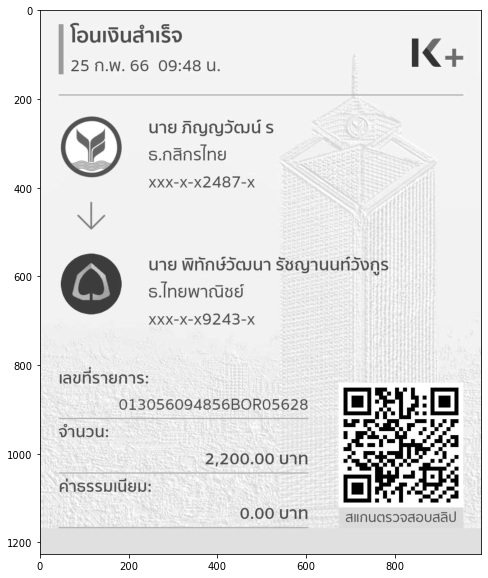

In [8]:
img=cv2.imread(list_path[0],0)
#_,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(img,"gray")

In [5]:
reader=easyocr.Reader(['th','en'])

ls = reader.readtext(img,detail=0,paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['โอนเงินสำเร็จ',
 '25 ก.พ. 66',
 '09:48 น.',
 'i+',
 'นาย',
 'ภิญญวัฒน์ s',
 'ธ.กสิกรไทย',
 ' xxx-x-x2487-x',
 'นาย พิทักษ์วัฒนา รัชญานนท์วังกูร',
 's.',
 '.ไทยพาณิชย์',
 ' xxx-x-x9243-x',
 'เลขที่ รายการ:',
 '013056094856b0r05628',
 'จำนวน:',
 '2,200.00 บาท',
 ' ค่าธรรมเนียม:',
 'o.00 บาท',
 ' สแกนตรวจสอบสลิป']

In [28]:
#Test the bank slip logical
list_path=os.listdir(r"kbank")
list_path=["kbank/"+i for i in list_path]
list_path

# Initialize the OCR reader
reader = easyocr.Reader(['en','th'])
 # Length of the pattern to match
check_list = []
img_list = []
for i in tqdm(range(0,20)):
    img = cv2.imread(list_path[i])
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ls = reader.readtext(gray, detail=0, paragraph=False)

    if sum(1 for w in ls if '.กสิกร' in w) >= 1 and sum(1 for w in ls if 'xxx-x-x' in w.lower()) >=1 :
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)



CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 20/20 [05:22<00:00, 16.10s/it]


In [29]:
# img_list[1]
check_list
# len('012045212258790754')

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']

In [26]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['th','en'])
    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k], 0)
        if img is not None:  # check if image was loaded correctly
            ls = reader.readtext(img, detail=0, paragraph=False)
            if sum(1 for w in ls if '.กสิกร' in w) >= 1 and sum(1 for w in ls if 'xxx-x-x' in w.lower()) >=1 :
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")

    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [01:45<00:00, 15.03s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:18<00:00, 19.76s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:57<00:00, 16.80s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['1', '1', '1', '1', '1', '1', '1']


100%|██████████| 7/7 [03:33<00:00, 30.43s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:45<00:00, 15.05s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [04:45<00:00, 40.76s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:15<00:00, 19.33s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [06:00<00:00, 51.45s/it]

check_list_ttb ['0', '0', '0', '0', '0', '0', '0']
